# D213 part 2 Sentiment Analysis using Neural Networks
## Task 2: Sentiment Analysis

Petra I Bier

Western Governors University

D213 Advanced Data Analytics

Feb 27, 2025

Dr. William Sewell PhD

--------------------------

### Table of Contents
* [Part I **Question**](#Part-I-Question)
    * [A1: Research Question](#A1:-Research-Question)
    * [A2: Goal](#A2:-Goal)
    * [A3: Neural Network](#A3:-Type-of-Neural-Network)
* [Part II **Preparation**](#Part-II-Data-Preparation)
    * [B1: Exploratory Data Analysis](#B1:-Exploratory-Data-Analysis)
    * [B2: Tokenization](#B2:-Tokenization)
    * [B3: Padding](#B3:-Padding)
    * [B4: Sentiment Categories](#B4:-Sentiment-Categories)
    * [B5: Data Cleaning and Splits](#B5:-Data-Cleaning-and-Splits)
    * [B6: Cleaned Data](#B6:-Cleaned-Data)
* [Part III **Neural Network**](#Part-III:-Neural-Network)
    * [C1: Model Summary](#C1:-Model-Summary)
    * [C2: Network Layers](#C2:-Network-Layers)
    * [C3: Hyperparameters](#C3:-Hyperparameters)
* [Part IV **Evaluation**](#Part-IV:-Evaluation)
    * [D1: Stopping Criteria](#D1:-Stopping-Criteria)
    * [D2: Model Evaluation](#D2:-Model-Evaluation)
    * [D2: Model Fitness Evaluation](#D2:-Model-Fitness-Evaluation)
    * [D4: Final Model Accuracy](#D4:-Final-Model-Accuracy)
* [Part V **Summary**](#Part-V:-Summary)
    * [E: Code](#Code)
    * [F: Functionality](#F:-Functionality)
    * [G: Recommendations](#Reccomendations)
* [Part VI **Reporting**](#Part-VI:-Reporting)
    * [H: Code](#Code)
    * [I: Web Sources](#I:-Web-Sources)
    * [J: Sources](#J:-Sources)


Note: While rubric sections are presented in order, some requirements reference steps completed at different stages of the analysis. Links and back links are provided to connect related content across sections.

## Part I Question
-----------------------

### A1: Research Question
Can Natural Language Processing (NLP) be used with a Neural Network (NN) to predict customer sentiment from reviews to improve customer satisfaction?


### A2: Goal
The goal of this analysis is to attempt to predict a customer’s sentiment based on the written reviews of services or products. Reviews with negative sentiment can be flagged and prioritized for rabid response in an effort to improve overall customer satisfaction.

### A3: Type of Neural Network

Text classification can be used in many business domains such as classifying medical records in the health care sector, fraud detection in the financial sector by examining communications, and for customer service using sentiment analysis.  This analysis’ goal is to create a model that can predict customer sentiment in order to improve customer satisfaction.

With sentiment analysis, natural language processing (NLP) is often used in conjunction with neural networks (NN). One type of neural network that is well suited to working with text is Recurrent Neural Networks (RNN). The sequential nature of language is confronted since RNNs are designed to have “memory” withing the deep layer nodes of the network. A particular drawback of RNNs is the vanishing gradient problem which can  cause the model to stop learning. This difficulty can be addressed using a type of RNN called Long Short-Term Memory (LSTM) (Saxena, 2024).

LSTM models use feedback loops within the model to capture enduring dependencies, which are often encountered in language. This analysis used a specific type of LSTM called Bidirectional LSTM (BiLSTM), which analyzed the text in both directions.


## Part II Data Preparation
----------------

In [1]:
# Set up of notebook
import os
import pandas as pd # used to create the dataframe
import numpy as np  #Required dependency for scikit.learn to run
import matplotlib.pyplot as plt # to visualize the data
import seaborn as sns #Used to visualize the data
import tensorflow as tf  # Using version 2.12.0
import csv # import the data from csv files
import contractions # Used to expand contractions during text cleaning
from num2words import num2words # Used to change numeric values to words during text cleaning
from sklearn.model_selection import train_test_split # Used to split the data for the model
from sklearn.metrics import precision_score, recall_score, f1_score # For Confusion matrix metrics
import re # Used for text cleaning
import nltk
nltk.download('punkt') # NLTK word dictionary
from nltk.tokenize import word_tokenize #Used to tokenize the words in the reviews
from nltk.corpus import stopwords # Used to remove stop words during the text cleaning process
from nltk.stem import WordNetLemmatizer # Used to lemmatize the vocabulary during the preprocessing
import optuna # used for hyperparameter tuning
from sklearn.metrics import confusion_matrix # Used to analyze performance of the neural network with the test data
from tensorflow.keras.preprocessing.text import Tokenizer   # Used to convert the text to numeric tokens
from tensorflow.keras.callbacks import EarlyStopping # To add early stopping criteria to the model
from tensorflow.keras.models import load_model, Sequential # Used to load the neural network model
from tensorflow.keras.preprocessing.sequence import pad_sequences # Used to pad the sequences to be usable for the embedding layer of the NN
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional, Dropout, GlobalAveragePooling1D, Masking # Used to create the layers of Neural Network
from tensorflow.keras.optimizers.legacy import Adam # Used to import the Adam optimizer used for the Neural network
import random # Used to set the random seed for reproducibility of Optuna study

import warnings # Ignore harmless warnings
warnings.filterwarnings("ignore")
optuna.logging.set_verbosity(optuna.logging.WARNING) # Decrease verbosity of Optuna learning hyperparameters

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1007)>


The data was imported from three separate CSVs and joined to create a single dataset (Kotzias, 2015).

In [2]:
# Read the amazon file
amazon = pd.read_csv('/Users/petrabier/PycharmProjects/WGU/D213_sentiment_files/amazon_cells_labelled.txt',
                 sep='\t',
                 quoting=csv.QUOTE_NONE,
                 header=None,
                 names=['review', 'score'])

# Verify
print("Shape of data:", amazon.shape)
print("\nFirst few reviews:")
print(amazon.head())

Shape of data: (1000, 2)

First few reviews:
                                              review  score
0  So there is no way for me to plug it in here i...      0
1                        Good case, Excellent value.      1
2                             Great for the jawbone.      1
3  Tied to charger for conversations lasting more...      0
4                                  The mic is great.      1


In [3]:
# Read the imdb file
imdb = pd.read_csv('/Users/petrabier/PycharmProjects/WGU/D213_sentiment_files/imdb_labelled.txt',
                 sep='\t',
                 quoting=csv.QUOTE_NONE,
                 header=None,
                 names=['review', 'score'])

# Verify
print("Shape of data:", imdb.shape)
print("\nFirst few reviews:")
print(imdb.head())

Shape of data: (1000, 2)

First few reviews:
                                              review  score
0  A very, very, very slow-moving, aimless movie ...      0
1  Not sure who was more lost - the flat characte...      0
2  Attempting artiness with black & white and cle...      0
3       Very little music or anything to speak of.        0
4  The best scene in the movie was when Gerardo i...      1


In [4]:
# Read the yelp file
yelp = pd.read_csv('/Users/petrabier/PycharmProjects/WGU/D213_sentiment_files/yelp_labelled.txt',
                 sep='\t',
                 quoting=csv.QUOTE_NONE,
                 header=None,
                 names=['review', 'score'])

# Verify
print("Shape of data:", yelp.shape)
print("\nFirst few reviews:")
print(yelp.head())

Shape of data: (1000, 2)

First few reviews:
                                              review  score
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1


In [5]:
#Combine the data sets
df_reviews = pd.concat([amazon, imdb, yelp], ignore_index = True)
df_reviews.shape

(3000, 2)

The new dataset was evaluated for missing values and the distribution of the scores was assessed.

In [6]:
df_reviews.head(10)

,review,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [7]:
print(df_reviews['score'].value_counts())

score
0    1500
1    1500
Name: count, dtype: int64


In [8]:
df_reviews.isna().sum()

review    0
score     0
dtype: int64

###### Sentiment Scores
A visualization of the sentiment score distribution was created. As defined in the data dictionary, a value of 0 is a negative sentence and a value of 1 is a positive sentence.

<Axes: xlabel='score', ylabel='count'>

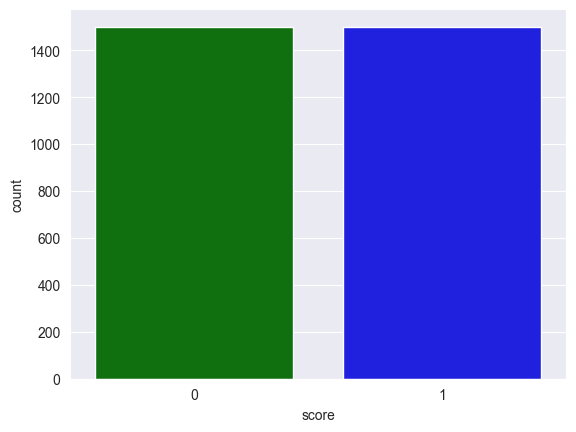

In [9]:
# Plot sentiment distribution
sns.countplot(x='score', data=df_reviews, palette=['green', 'blue'])

### B1: Exploratory Data Analysis

Working with language and text data requires cleaning that deals with more than things such as missing values and removal of duplicates. The text must  also be examined for things such as special characters, emojis and punctuation.

* Special characters were identified and then removed from the data as shown [here](#Special-Characters). Numerical values were changed to text equivalents.
* Vocabulary size was assessed after tokenization, stop word removal and lemmatization. This allowed for a true representation of the number of unique words in the dataset. The vocabulary size was determined to be 4552, which can be viewed [here](#Vocabulary-Size).
* The embedding length that will be used in the initial LSTM model will be eight. This is the value that will be used for the embedding dimension when building the embedding layer. This is also called `output_dim`. The embedding length was chosen using a statistical rule-of—thumb where the fourth root of the vocabulary size is calculated (Google, 2017). This embedding length is how many dimensions are assigned to each word. This can be thought of as how many descriptors are being used for each token.
* The maximum sequence length was determined after stop word removal and lemmatization were completed. The number of tokens for each review was statistically analyzed using a histogram that can be seen [here](#Sequence-Length). It was noted to have a right skew. The maximum number of tokens was 44 with the 99th percentile being 20 tokens. Due to the small data set and the relatively short maximum sequence length, in combination with a smaller data set of only 3000 rows, the longest review length of 44 was used. This value is used when determining the length of the padded sequences.

All values for the embedding layer of the LSTM model can be seen [here](#Embedding-Layer-Values).

In [10]:
#Find the different characters
characters = set()
for review in df_reviews['review']:
    for char in str(review):
        characters.add(char)

list_char = sorted(list(characters))

print("Unique characters found:", len(list_char))
print("Characters:", list_char)

Unique characters found: 89
Characters: [' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '\x85', '\x96', '\x97', 'å', 'é', 'ê']


###### Special Characters
All special characters were removed, including URLS, emojis, and numbers were changed to text (Mayo, 2023).

In [11]:
# Remove special characters but keep spaces
df_reviews['clean'] = df_reviews['review'].str.replace(r'[^a-zA-Z\s]', ' ', regex=True)
# Remove URLs
df_reviews['clean'] = df_reviews['clean'].str.replace(r'http\S+|www.\S+', '', case=False)
# Remove emojis specifically
df_reviews['clean'] = df_reviews['clean'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)
# Preserve measurements
df_reviews['clean'] = df_reviews['clean'].str.replace(
    r'(\d+\+?\s*(?:ft|cm|m|inch|kg|lb))',
    lambda m: m.group(1).replace('+', ' plus '),
    regex=True)
# Handle numbers by changing them to text
def normalize_numbers(text):
    words = str(text).split()
    words = [num2words(int(w)) if w.isdigit() else w for w in words]
    return ' '.join(words)
df_reviews['clean'] = df_reviews['clean'].apply(normalize_numbers)
# Remove extra whitespace
df_reviews['clean'] = df_reviews['clean'].str.replace(r'\s+', ' ', regex=True).str.strip()
#Verify
print(''.join(sorted(set(''.join(df_reviews['clean'])))))


 ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz


In [12]:
#Verify that there are no special characters
non_alpha = df_reviews[df_reviews['clean'].str.contains(r'[^a-zA-Z\s]')]
print(f"Rows with special characters: {len(non_alpha)}")
print(non_alpha.head())

Rows with special characters: 0
Empty DataFrame
Columns: [review, score, clean]
Index: []


Note. For this analysis, new columns were created in the DataFrame at each step to track and visualize the text cleaning process. This allowed for comparison of steps in the text preprocessing.

In [13]:
df_reviews.head(10)

,review,score,clean
0,So there is no way for me to plug it in here i...,0,So there is no way for me to plug it in here i...
1,"Good case, Excellent value.",1,Good case Excellent value
2,Great for the jawbone.,1,Great for the jawbone
3,Tied to charger for conversations lasting more...,0,Tied to charger for conversations lasting more...
4,The mic is great.,1,The mic is great
5,I have to jiggle the plug to get it to line up...,0,I have to jiggle the plug to get it to line up...
6,If you have several dozen or several hundred c...,0,If you have several dozen or several hundred c...
7,If you are Razr owner...you must have this!,1,If you are Razr owner you must have this
8,"Needless to say, I wasted my money.",0,Needless to say I wasted my money
9,What a waste of money and time!.,0,What a waste of money and time


In [14]:
# Count of numbers before
number_count_before = df_reviews['review'].str.count(r'\d+').sum()
print(f"Numbers before: {number_count_before}")
# Count of numbers after
number_count_after = df_reviews['clean'].str.count(r'\d+').sum()
print(f"Numbers after: {number_count_after}")

Numbers before: 307
Numbers after: 0


###### Text Normalization
All text data was normalized, meaning all text was changed to lowercase. In Natural Language Processing (NLP), this allows for the difference between the same words that are both lower and upper case ("Good", "good", "GOOD") to be treated as the same word. This reduces the size of the vocabulary to be analyzed and allows for improved analytics by the NN.

In [15]:
#Lowercase the strings
df_reviews['low_review'] = df_reviews['clean'].str.lower()
df_reviews.head(10)

,review,score,clean,low_review
0,So there is no way for me to plug it in here i...,0,So there is no way for me to plug it in here i...,so there is no way for me to plug it in here i...
1,"Good case, Excellent value.",1,Good case Excellent value,good case excellent value
2,Great for the jawbone.,1,Great for the jawbone,great for the jawbone
3,Tied to charger for conversations lasting more...,0,Tied to charger for conversations lasting more...,tied to charger for conversations lasting more...
4,The mic is great.,1,The mic is great,the mic is great
5,I have to jiggle the plug to get it to line up...,0,I have to jiggle the plug to get it to line up...,i have to jiggle the plug to get it to line up...
6,If you have several dozen or several hundred c...,0,If you have several dozen or several hundred c...,if you have several dozen or several hundred c...
7,If you are Razr owner...you must have this!,1,If you are Razr owner you must have this,if you are razr owner you must have this
8,"Needless to say, I wasted my money.",0,Needless to say I wasted my money,needless to say i wasted my money
9,What a waste of money and time!.,0,What a waste of money and time,what a waste of money and time


In [16]:
#Remove contractions
df_reviews['text'] = df_reviews['low_review'].apply(lambda x: contractions.fix(x))
df_reviews.head()

,review,score,clean,low_review,text
0,So there is no way for me to plug it in here i...,0,So there is no way for me to plug it in here i...,so there is no way for me to plug it in here i...,so there is no way for me to plug it in here i...
1,"Good case, Excellent value.",1,Good case Excellent value,good case excellent value,good case excellent value
2,Great for the jawbone.,1,Great for the jawbone,great for the jawbone,great for the jawbone
3,Tied to charger for conversations lasting more...,0,Tied to charger for conversations lasting more...,tied to charger for conversations lasting more...,tied to charger for conversations lasting more...
4,The mic is great.,1,The mic is great,the mic is great,the mic is great


### B2: Tokenization
Prior to the tokenization process, the text was [normalized](#Text-Normalization) to all lower case.

The strings were tokenized into individual elements, which are called tokens. This allows NLP software and machine learning models to recognize the individual building blocks of language (Vajjala et al., 2020, p. 50). When words are separated out from paragraphs or sentences into individual tokens, models can then run analysis on these tokens, such as counting usage and looking for patterns.

All packages and libraries were loaded in the first code cell of this analysis. The packages used for tokenization include NLTK for the word_tokenize function, which splits text into word-level tokens.
* `import nltk`
* `from nltk.tokenize import word_tokenize`

In order for the text to be processed in Tensor flow, the strings must be changed to a numeric value. Using the `Tokenizer()` class from the Keras library, the text was transformed into numeric sequences. This process, called sequencing, maps each word to a numeric index value, allowing the text values to be used within the neural network. The code for the Tokenizer can be seen [here](#Tokenizer-Class).
* `from tensorflow.keras.preprocessing.text import Tokenizer`

In [17]:
df_reviews['tokenized_text'] = df_reviews['text'].apply(word_tokenize)
df_reviews.head(10)

,review,score,clean,low_review,text,tokenized_text
0,So there is no way for me to plug it in here i...,0,So there is no way for me to plug it in here i...,so there is no way for me to plug it in here i...,so there is no way for me to plug it in here i...,"[so, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,Good case Excellent value,good case excellent value,good case excellent value,"[good, case, excellent, value]"
2,Great for the jawbone.,1,Great for the jawbone,great for the jawbone,great for the jawbone,"[great, for, the, jawbone]"
3,Tied to charger for conversations lasting more...,0,Tied to charger for conversations lasting more...,tied to charger for conversations lasting more...,tied to charger for conversations lasting more...,"[tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,The mic is great,the mic is great,the mic is great,"[the, mic, is, great]"
5,I have to jiggle the plug to get it to line up...,0,I have to jiggle the plug to get it to line up...,i have to jiggle the plug to get it to line up...,i have to jiggle the plug to get it to line up...,"[i, have, to, jiggle, the, plug, to, get, it, ..."
6,If you have several dozen or several hundred c...,0,If you have several dozen or several hundred c...,if you have several dozen or several hundred c...,if you have several dozen or several hundred c...,"[if, you, have, several, dozen, or, several, h..."
7,If you are Razr owner...you must have this!,1,If you are Razr owner you must have this,if you are razr owner you must have this,if you are razr owner you must have this,"[if, you, are, razr, owner, you, must, have, t..."
8,"Needless to say, I wasted my money.",0,Needless to say I wasted my money,needless to say i wasted my money,needless to say i wasted my money,"[needless, to, say, i, wasted, my, money]"
9,What a waste of money and time!.,0,What a waste of money and time,what a waste of money and time,what a waste of money and time,"[what, a, waste, of, money, and, time]"


In [18]:
#Assess reviews size and statistics before stopword removal
df_reviews['word_count'] = df_reviews['tokenized_text'].str.len()
word_stats = df_reviews['word_count'].describe()
print(word_stats)

count    3000.000000
mean       12.059667
std         8.071048
min         0.000000
25%         6.000000
50%        10.000000
75%        16.000000
max        74.000000
Name: word_count, dtype: float64


Stopwords were removed from the tokenized text. These are words that have a high occurrence rate but have little verbal importance (Bird et al., 2009, p. 60).

In [19]:
# Remove stopwords using NLTK
stop_words = stopwords.words('english')
df_reviews['stopped'] = df_reviews['text'].apply(lambda x: [word for word in x.split() if word not in stop_words])
df_reviews.head()

,review,score,clean,low_review,text,tokenized_text,word_count,stopped
0,So there is no way for me to plug it in here i...,0,So there is no way for me to plug it in here i...,so there is no way for me to plug it in here i...,so there is no way for me to plug it in here i...,"[so, there, is, no, way, for, me, to, plug, it...",21,"[way, plug, us, unless, go, converter]"
1,"Good case, Excellent value.",1,Good case Excellent value,good case excellent value,good case excellent value,"[good, case, excellent, value]",4,"[good, case, excellent, value]"
2,Great for the jawbone.,1,Great for the jawbone,great for the jawbone,great for the jawbone,"[great, for, the, jawbone]",4,"[great, jawbone]"
3,Tied to charger for conversations lasting more...,0,Tied to charger for conversations lasting more...,tied to charger for conversations lasting more...,tied to charger for conversations lasting more...,"[tied, to, charger, for, conversations, lastin...",11,"[tied, charger, conversations, lasting, minute..."
4,The mic is great.,1,The mic is great,the mic is great,the mic is great,"[the, mic, is, great]",4,"[mic, great]"


The text was then lemmatized, which is the process of changing a word to its base root. This differs from stemming, in that the word is not just taken down to its stem, but analyzed and changed to its root word. This process requires more linguistic analysis than stemming and involves using downloaded look up tables.  (Vajjala et al., 2020, p. 54).

In [20]:
#Lemmatize the reviews
#Create WordNetLemmatizer object
wnl = WordNetLemmatizer()
df_reviews['lemmatized'] = df_reviews['stopped'].apply(lambda x: ' '.join([wnl.lemmatize(word) for word in x]))
df_reviews.head()

,review,score,clean,low_review,text,tokenized_text,word_count,stopped,lemmatized
0,So there is no way for me to plug it in here i...,0,So there is no way for me to plug it in here i...,so there is no way for me to plug it in here i...,so there is no way for me to plug it in here i...,"[so, there, is, no, way, for, me, to, plug, it...",21,"[way, plug, us, unless, go, converter]",way plug u unless go converter
1,"Good case, Excellent value.",1,Good case Excellent value,good case excellent value,good case excellent value,"[good, case, excellent, value]",4,"[good, case, excellent, value]",good case excellent value
2,Great for the jawbone.,1,Great for the jawbone,great for the jawbone,great for the jawbone,"[great, for, the, jawbone]",4,"[great, jawbone]",great jawbone
3,Tied to charger for conversations lasting more...,0,Tied to charger for conversations lasting more...,tied to charger for conversations lasting more...,tied to charger for conversations lasting more...,"[tied, to, charger, for, conversations, lastin...",11,"[tied, charger, conversations, lasting, minute...",tied charger conversation lasting minute major...
4,The mic is great.,1,The mic is great,the mic is great,the mic is great,"[the, mic, is, great]",4,"[mic, great]",mic great


###### Vocabulary Size
The vocabulary size was determined based on the number of unique words.

In [21]:
#Find vocab size using unique words across all reviews
vocabulary_size = len(set([word for tokens in df_reviews['lemmatized'].str.split() for word in tokens]))
print(f"Vocabulary size: {vocabulary_size}")

Vocabulary size: 4541


##### Tokenizer Class

Using the Keras Tokenizer library, a vocabulary mapping was created with each unique word assigned a numeric index value. The texts were then converted into sequences of these numeric values by applying this mapping. This sequence encoding allows the text data to be processed by the neural network.

In [22]:
# Vocab mapping and sequencing
tokenizer = Tokenizer(num_words=vocabulary_size, oov_token='<oov>')
# Fit the tokenizer
tokenizer.fit_on_texts(df_reviews['lemmatized'])
word_index = tokenizer.word_index
# Convert text to sequences of tokens
df_reviews['token_seq'] = tokenizer.texts_to_sequences(df_reviews['lemmatized'])
# verify conversion to tokens
df_reviews['token_seq'].head(10)

0                       [42, 244, 98, 462, 23, 2000]
1                                   [2, 57, 33, 306]
2                                           [4, 944]
3                [2001, 120, 615, 945, 58, 1298, 73]
4                                           [741, 4]
5             [2002, 244, 24, 109, 66, 24, 371, 267]
6    [268, 946, 268, 2003, 742, 947, 328, 743, 7, 7]
7                                    [616, 372, 152]
8                                 [948, 53, 329, 77]
9                                        [69, 77, 8]
Name: token_seq, dtype: object

###### Sequence Length
Statistical analysis of review length to determine sequence length to be used for padding. The distribution of tokens per review showed a maximum length of 44 tokens with the 99th percentile at 20 tokens. Due to the small size of the dataset (3000 rows) the decision was made to use the maximum length of 44 tokens as the padding length in order to keep as much information as possible for the analysis. The justification for the maximum sequence length was addressed earlier in Section B1 and can be seen [here](#B1:-Exploratory-Data-Analysis) in the forth bullet point.

Percentiles:
0.80     9.0
0.90    11.0
0.95    13.0
0.99    20.0
Name: token_seq, dtype: float64


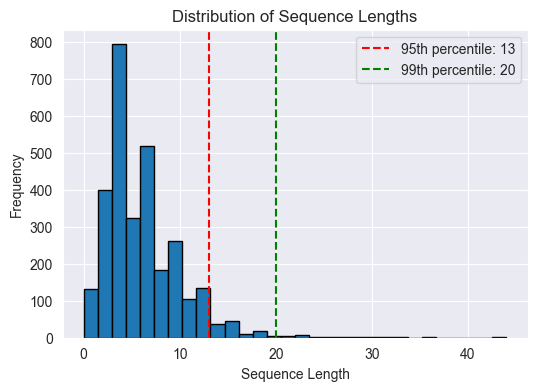

In [23]:
# Get the sequence lengths
sequence_lengths = df_reviews['token_seq'].str.len()

# Calculate percentiles
print("Percentiles:")
print(sequence_lengths.quantile([0.8, 0.9, 0.95, 0.99]))

# Create histogram
plt.figure(figsize=(6, 4))
plt.hist(sequence_lengths, bins=30, edgecolor='black')
plt.axvline(x=sequence_lengths.quantile(0.95), color='r', linestyle='--',
            label=f'95th percentile: {sequence_lengths.quantile(0.95):.0f}')
plt.axvline(x=sequence_lengths.quantile(0.99), color='g', linestyle='--', label=f'99th percentile: {sequence_lengths.quantile(0.99):.0f}')
plt.title('Distribution of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [24]:
#Token count
df_reviews['token_count'] = df_reviews['token_seq'].str.len()
df_reviews['unique_tokens'] = df_reviews['token_seq'].apply(lambda x: len(set(x)))
df_reviews.head(10)

,review,score,clean,low_review,text,tokenized_text,word_count,stopped,lemmatized,token_seq,token_count,unique_tokens
0,So there is no way for me to plug it in here i...,0,So there is no way for me to plug it in here i...,so there is no way for me to plug it in here i...,so there is no way for me to plug it in here i...,"[so, there, is, no, way, for, me, to, plug, it...",21,"[way, plug, us, unless, go, converter]",way plug u unless go converter,"[42, 244, 98, 462, 23, 2000]",6,6
1,"Good case, Excellent value.",1,Good case Excellent value,good case excellent value,good case excellent value,"[good, case, excellent, value]",4,"[good, case, excellent, value]",good case excellent value,"[2, 57, 33, 306]",4,4
2,Great for the jawbone.,1,Great for the jawbone,great for the jawbone,great for the jawbone,"[great, for, the, jawbone]",4,"[great, jawbone]",great jawbone,"[4, 944]",2,2
3,Tied to charger for conversations lasting more...,0,Tied to charger for conversations lasting more...,tied to charger for conversations lasting more...,tied to charger for conversations lasting more...,"[tied, to, charger, for, conversations, lastin...",11,"[tied, charger, conversations, lasting, minute...",tied charger conversation lasting minute major...,"[2001, 120, 615, 945, 58, 1298, 73]",7,7
4,The mic is great.,1,The mic is great,the mic is great,the mic is great,"[the, mic, is, great]",4,"[mic, great]",mic great,"[741, 4]",2,2
5,I have to jiggle the plug to get it to line up...,0,I have to jiggle the plug to get it to line up...,i have to jiggle the plug to get it to line up...,i have to jiggle the plug to get it to line up...,"[i, have, to, jiggle, the, plug, to, get, it, ...",17,"[jiggle, plug, get, line, right, get, decent, ...",jiggle plug get line right get decent volume,"[2002, 244, 24, 109, 66, 24, 371, 267]",8,7
6,If you have several dozen or several hundred c...,0,If you have several dozen or several hundred c...,if you have several dozen or several hundred c...,if you have several dozen or several hundred c...,"[if, you, have, several, dozen, or, several, h...",21,"[several, dozen, several, hundred, contacts, i...",several dozen several hundred contact imagine ...,"[268, 946, 268, 2003, 742, 947, 328, 743, 7, 7]",10,8
7,If you are Razr owner...you must have this!,1,If you are Razr owner you must have this,if you are razr owner you must have this,if you are razr owner you must have this,"[if, you, are, razr, owner, you, must, have, t...",9,"[razr, owner, must]",razr owner must,"[616, 372, 152]",3,3
8,"Needless to say, I wasted my money.",0,Needless to say I wasted my money,needless to say i wasted my money,needless to say i wasted my money,"[needless, to, say, i, wasted, my, money]",7,"[needless, say, wasted, money]",needless say wasted money,"[948, 53, 329, 77]",4,4
9,What a waste of money and time!.,0,What a waste of money and time,what a waste of money and time,what a waste of money and time,"[what, a, waste, of, money, and, time]",7,"[waste, money, time]",waste money time,"[69, 77, 8]",3,3


In [25]:
# Get token count stats
print(df_reviews['token_seq'].str.len().describe())

count    3000.000000
mean        6.012000
std         4.139674
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        44.000000
Name: token_seq, dtype: float64


### B3: Padding
In order to input the sequences into a neural network, it must be in a uniform shape (Caner, 2020). At this point in the analysis, each row has a different sequence length. This problem can be solved through a process called padding. To make all sequences equal length, value 0 is used as a placeholder. The neural network will not view it as an actual zero value when doing the analysis.

The padding can take place at the beginning of each sequence, or at the end. For this analysis, padding was done after the sequences, meaning that each sequence of values was filled to 44 spaces with zeros. This choice of what type of padding to use can be seen in the code as `padding= 'post'` .

A single padded sequence can be seen [here](#Padded-Sequence-Example).

In [26]:
#Padded the sequenced sentences
padded = pad_sequences(df_reviews['token_seq'], padding= 'post',  maxlen=44)

In [27]:
print(padded.shape)

(3000, 44)


###### Padded Sequence Example
An example of a single padded sequence is in the cell below.

In [28]:
print(padded[0])

[  42  244   98  462   23 2000    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [29]:
#Check that data is in an array for loading into Keras
print(type(padded))

<class 'numpy.ndarray'>


In [30]:
# Convert y(target value) to numpy
score = df_reviews['score'].to_numpy()

In [31]:
# Combine for a final array
combined_array = np.column_stack((padded, score))
print(combined_array)

[[  42  244   98 ...    0    0    0]
 [   2   57   33 ...    0    0    1]
 [   4  944    0 ...    0    0    1]
 ...
 [ 172  153   17 ...    0    0    0]
 [ 256   79 1891 ...    0    0    0]
 [ 329   61   83 ...    0    0    0]]


### B4: Sentiment Categories
For this sentiment analysis two categories will be used, negative and positive. The positive reviews have a 1 value and the negative reviews have 0 value. The distribution of the sentiment scores was visualized early on in the analysis, and can be seen [here](#Sentiment-Scores).

Since this is a binary classification, the activation function for the final layer of the NN will be a sigmoid activation. The mathematical representation of the sigmoid function is :

$f(x) = \frac{1}{1 + e^{-x}}$

The sigmoid function can be thought of as "squishing" all values into a range between 0 and 1, where very negative values are closer to 0, and very positive number is closer to 1. The curve can be thought of as the probability of a particular result occurring. This makes it very useful for classification tasks in the output layer (Ali, 2024).

 ### B5: Data Cleaning and Splits
The following section highlights the data cleaning steps taken for this sentiment analysis. Although many cells contain code for verification of the cleaning process, only steps that directly contributed to data preparation are documented in this section. Some extra exploratory steps were taken for educational purposes which can be seen in the analysis, though they were not strictly required for this project.

- Imported necessary packages and libraries
- Uploaded and joined the three data sets
- Examine the data and shape of the data
- Clean the text
  - Removal of special characters, emojis, numbers
  - Convert all text to lower case
  - Removed contractions
- Split Sentences into word tokens
- Removed stop words from data
- Performed lemmatization of word tokens
- Text converted to sequences using Keras Tokenizer
- Examined statistic of sequence distribution and determined max sequence length to use for padding
- Padding applied post sequences
- All data converted to array for use in neural network

The cleaned data was then split into Data split into 3 parts: training, validation, and test. The training data was 80%, while the validation and the test data each were each 10% of the data. This 80/10/10 split is a widely used industry standard (Baheti, 2021). The data split can be seen in the cell below.

In [32]:
#Split the data into train, validate, test
X = padded
y = score
# First split: separate test set (10% of data)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# Second split: divide remaining data into train and validation
# 0.111 = 10/90 to get 10% of original data for validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.111111, random_state=42)
# To verify the split sizes:
print(f"Training set size: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Validation set size: {len(X_val)} ({len(X_val)/len(X)*100:.1f}%)")
print(f"Test set size: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")

Training set size: 2400 (80.0%)
Validation set size: 300 (10.0%)
Test set size: 300 (10.0%)


### B6: Cleaned Data
The cleaned and prepared data set was downloaded as both a CSV and Numpy array.

In [33]:
# Save as numpy array
np.save('PBier_213_pt2.npy', combined_array)
# Save as CSV
pd.DataFrame(combined_array).to_csv('PBier_213_pt2.csv', index=False)

## Part III: Neural Network
----------------------

###### Embedding Layer Values
Calculate values for the embedding layer within the LSTM model. This layer is where the input tokens are converted into vectors that the network can interpret.

In [34]:
# Embedding will be done within the model
# For input_dim (vocabulary size)
vocab_size = len(word_index) + 1
# Calculate fourth root for embedding dimension - output_dimension
embedding_dim = int(vocab_size ** 0.25)
#Get max sequence length - input length
max_length = max(df_reviews['token_seq'].str.len())

print(f"Vocabulary Size: {vocab_size:,}")
print(f"Recommended Embedding Dimension (fourth root): {embedding_dim}")
print(f"Max Sequence Length: {max_length}")

Vocabulary Size: 4,543
Recommended Embedding Dimension (fourth root): 8
Max Sequence Length: 44


In [35]:
# Code to set seed for reproducibility of model
# Enable deterministic operations
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['PYTHONHASHSEED'] = '0'
tf.config.experimental.enable_op_determinism()
#Set seed
np.random.seed(123)
tf.random.set_seed(123)
random.seed(123)

### C1: Model Summary
For this project, a bidirectional short-term memory model (BiLSTM) was built. The `model.summary()` function was used to view the architecture of the model. The model below is the initial model.

In [36]:
#Build the primary model. Bidirectional LSTM model
model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                   output_dim= embedding_dim,
                   input_length=max_length))
model.add(Masking(mask_value=0))
model.add(Bidirectional(LSTM(units=64, activation='relu', return_sequences=True)))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu')),   # Added intermediate dense layer
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.0005),
             loss='binary_crossentropy',
             metrics=['accuracy'])


In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 44, 8)             36344     
                                                                 
 masking (Masking)           (None, 44, 8)             0         
                                                                 
 bidirectional (Bidirectiona  (None, 44, 128)          37376     
 l)                                                              
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 32)                4

### C2: Network Layers

The model architecture consists of 8 layers:

1. Embedding layer: The input tokens are converted into vectors that the network can interpret. There are 8 dimensions per token, the vocabulary size of 4,543 words, which leads to 36,344 parameters for this layer.

2. Masking layer: Manages the padding in sequences by acting as a filter for the 0 value, so that the model is not learning from this padded value.

3. Bidirectional LSTM layer: The sequences are analyzed both forwards and backwards. There are 37,376 parameters in this layer.

4. GlobalAveragePooling1D layer: The dimension of the sequences is reduced through averaging, which in turn reduces the number of parameters. This reduction helps reduce the problem of overfitting.

5. Dropout layer: Some nodes are randomly turned off, allowing the network to learn from other features rather than becoming dependent on any specific parameters. These layers also help address the overfitting problem that can occur in neural networks.

6. Dense layer: Information from the previous layers is analyzed collectively; abstracted learning takes place. All previous layers converge to 32 nodes. There are 4,128 parameters at this layer.

7. Dropout layer: Second dropout layer.

8. Dense layer: This is the final layer where the parameters are again analyzed and reduced to a binary classification for the output layer. This final layer has 33 parameters.

Total parameters: 77,881 (all trainable)


### C3: Hyperparameters
When building a NN, hyperparameters must be set to help adjust the learning progress of the model. The primary model had several different hyperparameters to set.

* Activation functions:
  * The Rectified Linear Unit (ReLU) activation function was used for the BiLSTM layer as well as the first dense layer. This addresses the problem of the vanishing gradient by keeping the scale of the outputs during the backward propagation phase of the learning process.

     f(x) = max(0, x)

  * A Sigmoid activation function was used for the final dense layer. It is frequently used in binary classification models since it scales the data to a probability of occurring between the values of 0 to 1. The output layer uses sigmoid for binary classification (Ali, 2024).

     f(x) = 1 / (1 + e^-x)

* Number of nodes per layer:
  * Embedding dimension- 8 nodes: This value was chosen based on the common rule of taking the fourth root of the size of the vocabulary, as discussed in section [B1](#B1:-Exploratory-Data-Analysis).

  * Bidirectional layer: 64 units per direction (128 total): The value chosen is a power of 2 number which is considered a computationally efficient value. This layer is bidirectional, creating a total of 128 features.

  * First dense layer: 32 nodes: This layer continues to reduce dimensionality, while also maintaining the thought process of using values that are a power of 2.

  * Output layer- 1 node: One node is used with a sigmoid activation function since it is a binary classification task.

* Loss Function: During the model's learning process, it is important to have methods that help reduce the prediction errors. Loss functions help adjust the weights between the nodes during the learning process to help minimize the errors. Binary Cross-Entropy (BCE) was used for the loss function in the model as it is well suited for binary classification models due to its penalization for wrong classifications (Sanchhaya, 2024).

* Optimizer: The Adaptive Moment Estimation (Adam) optimizer was used in the BiLSTM model. An optimizer is an algorithm that helps adjust the parameters in order to improve a models' performance. The Adam optimizer performs well with NLP and NNs (Wei, 2024).

* Stopping Criteria: This model had two criteria for stopping. The early stopping criterion used the validation loss (`val_loss`) metric to determine if no improvement had occurred for five epochs. Since this metric is looking at how well the model is performing on unseen data, it is preferred over the accuracy metric for early stopping (Brownlee, 2019).The second stopping criteria was number of epochs set when the model was fit to the data, which was 50. This is a large number, that allowed the possibility of a longer training time, while still creating a hard stop for the model if the early stopping criteria was not used. Both the [early stopping](#Early-Stopping) and the [model fit](#Fit-the-Model) criteria can be seen in the two cells below.

* Evaluation Metric: The evaluation metric of the model is accuracy, which measures how often a prediction matches with an actual value. This is calculated at the end of each epoch.

  $\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}} = \frac{TP + TN}{TP + TN + FP + FN}$

* Learning Rate: The learning rate affects the speed at which the model learns. Higher learning rates learn faster, but may skip over important gradient weight updates, while very low learning rates can significantly slow the model's performance dor may even become stuck on a poor solution.  The learning rate is considered by some experts in the machine learning field one of the most important hyperparameters in a NN model. A recommended starting value is between less than 1 and greater than 10^-6 (Brownlee, 2019). The value for the initial BiLSTM was chosen in the middle, at a value of 0.0005.

## Part IV: Evaluation
------------------

### D1: Stopping Criteria

The early stopping criterion used the validation loss (`val_loss`) metric to determine if no improvement had occurred for five epochs. The number of epochs was set to 50. This is a large number, that allowed the possibility of a longer training time, while still creating a hard stop for the model if the early stopping criteria was not used.

The early stopping criteria was activated and the model stopped at 10 epochs. This implies that the model had stopped learning and had an increasing validation data loss during the training process. By early stopping, the model is prevented from overfitting and simply "memorizing" the data through more training epochs.

* The [final epoch](#Fit-the-Model) can be seen below the model fit.
  * Epoch 10/50
75/75 [==============================] - 1s 13ms/step - loss: 0.0964 - accuracy: 0.9696 - val_loss: 1.0436 - val_accuracy: 0.8000



* Early stopping has an option to `restore_best_weights`, which means that after the model has stopped, the epoch that had the best values before the stop criteria was met are the actual values that are used in the model. The [best values](#Evaluation-Metrics) were at epoch 6.
  * Epoch 6/50
75/75 [==============================] - 1s 13ms/step - loss: 0.1956 - accuracy: 0.9392 - val_loss: 0.5083 - val_accuracy: 0.8133


###### Early Stopping

In [38]:
# Add Early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    mode='min',
)

###### Fit the Model

In [39]:
# Fit Model
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stop]
)

Epoch 1/50


2025-02-27 13:43:09.316045: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


75/75 [==============================] - 1s 11ms/step - loss: 0.6932 - accuracy: 0.5017 - val_loss: 0.6929 - val_accuracy: 0.5233
Epoch 2/50
75/75 [==============================] - 1s 13ms/step - loss: 0.6926 - accuracy: 0.5371 - val_loss: 0.6914 - val_accuracy: 0.4767
Epoch 3/50
75/75 [==============================] - 1s 14ms/step - loss: 0.5766 - accuracy: 0.7504 - val_loss: 0.5965 - val_accuracy: 0.7433
Epoch 4/50
75/75 [==============================] - 1s 14ms/step - loss: 0.4992 - accuracy: 0.7808 - val_loss: 0.5085 - val_accuracy: 0.7800
Epoch 5/50
75/75 [==============================] - 1s 14ms/step - loss: 0.3105 - accuracy: 0.8904 - val_loss: 0.4556 - val_accuracy: 0.7900
Epoch 6/50
75/75 [==============================] - 1s 14ms/step - loss: 0.1956 - accuracy: 0.9392 - val_loss: 0.5083 - val_accuracy: 0.8133
Epoch 7/50
75/75 [==============================] - 1s 13ms/step - loss: 0.1437 - accuracy: 0.9563 - val_loss: 0.6340 - val_accuracy: 0.8000
Epoch 8/50
75/75 [======

### D2: Model Fitness Evaluation

* Fitness of Model: The accuracy and training loss were compared in both the training and validation data. While the training data had both high accuracy (0.97) and low training loss(0.096), the validation data did not perform as well (accuracy: 0.80, loss: 1.04) implying that there may be some overfitting of the model. This was confirmed by the generalization gap, which is the accuracy difference between the training data and the validation data, with lower values indicating a better fit (Zhang et al., 2023). This model has a gap of 17%, indicating overfitting. The metrics can be viewed in the cell below.

* Addressing Overfitting: To improve the model, the overfitting was addressed in two ways. The first was to add L2 regularization to the first dense layer, and the second was building an Optuna optimizer study to find the best values for hyperparameter tuning.
  * L2 Regularization - Regularization will apply a penalty to the loss function for the layer it is applied to, which is a means of simplifying the model. The L2 class is suited to learning patterns such as those in NLP models (Sagar, 2019).
  * Optuna Study — An optimizer was [created here](#Create-Optuna-optimizer-study) to fine tune the hyperparameters. Optuna (Preferred Networks, Inc., 2024) is known for being computationally faster than GridSearch CV, since it learns from each previous iteration. It also used a continuous scale for any given hyperparameter to search through, rather than just using specific defined values. Due to the ability to learn, it is able to stop any search that is not valuable in improving the model's outcome, leading to a greatly decreased search time (Akinremi, 2024). Once the new hyperparameters were found, a final model was created.
    * Hyperparameters evaluated in the study (Restack, 2025) included:
      * Embedding dimension
      * LSTM layer nodes
      * Dense layer nodes
      * Dropout rate for both dropout layers
      * L2 Regularization
      * Learning rate
      * Batch size
      * Epochs
      * Activation function for the LSTM layer
      * Activation functions for the initial dense layer

Note.  The final model was used for analysis in section D4 and all later sections and can be found [here](#Create-Final-Model).


###### Evaluation Metrics
The loss and accuracy metrics were used for evaluation of the model.

In [40]:
#Create function for overfitting analysis
def check_overfitting(history):
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]
    train_loss = history.history['loss'][-1]
    val_loss = history.history['val_loss'][-1]
    gap = train_acc - val_acc
    best_epoch = early_stop.best_epoch + 1

    print(f'\nFinal Metrics:')
    print(f'Training Accuracy: {train_acc:.3f}')
    print(f'Validation Accuracy: {val_acc:.3f}')
    print(f'Training Loss: {train_loss:.3f}')
    print(f'Validation Loss: {val_loss:.3f}')
    print('\nOverfitting:')
    print(f'Generalization Gap: {gap:.3f} ({gap*100:.1f}%)')
    print(f'Best Epoch: {best_epoch + 1}')

check_overfitting(history)


Final Metrics:
Training Accuracy: 0.970
Validation Accuracy: 0.800
Training Loss: 0.096
Validation Loss: 1.044

Overfitting:
Generalization Gap: 0.170 (17.0%)
Best Epoch: 6


In [41]:
# Create function for accuracy and loss visualization
def fit_overfit(history, epochs):
    actual_epochs = len(history.history['accuracy'])
    epoch_range = range(actual_epochs)
    # Loss
    plt.figure(figsize=(10, 5))
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training Data', 'Validation Data'], loc='upper left')
    plt.show()
    # Accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training Data', 'Validation Data'], loc='upper left')
    plt.show()


### D3: Model Training Visualization
A visualization of the training process was created, using both the loss and accuracy metrics from the model. The loss graph shows that the training data had decreasing loss, while the validation data plateaued or increased. The accuracy graph shows the improvement of the training data, while the validation data levels off. This is indicative of the model memorizing the data, rather than learning the data (Boros, 2023). Both of these graphs reinforce that overfitting is occurring with this initial model.

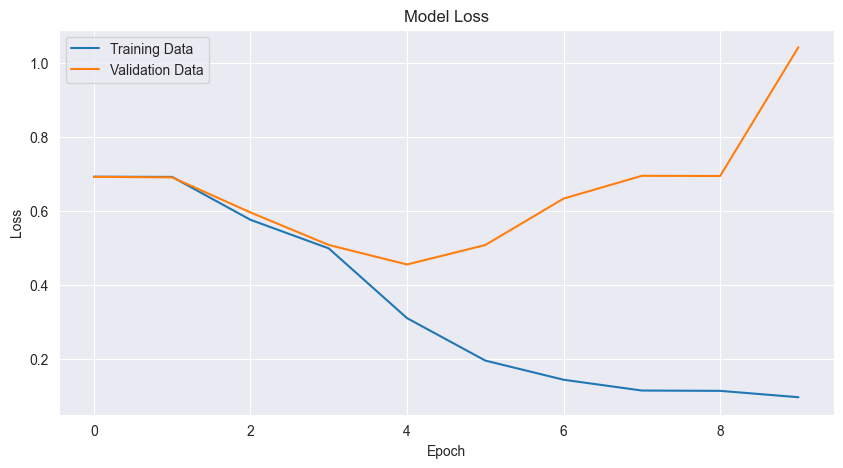

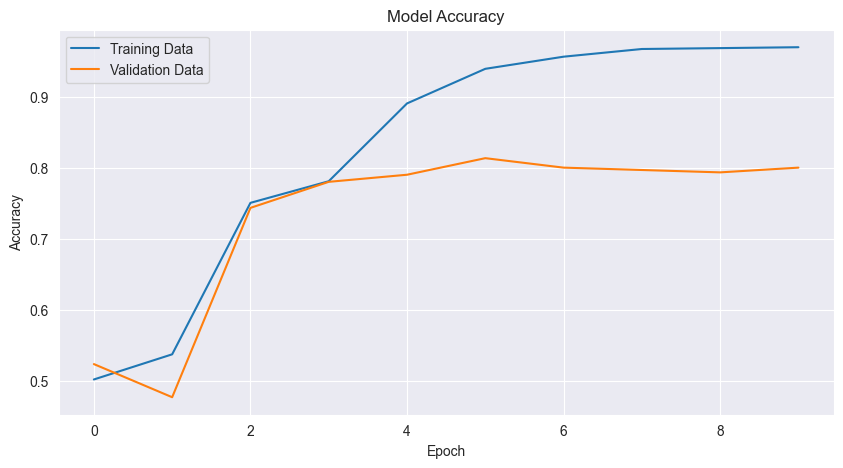

In [42]:
fit_overfit(history,10)

##### Create Optuna optimizer study

In [43]:
# Ensure reproducibility of Optuna study
def set_all_seeds(seed):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    return optuna.samplers.TPESampler(seed=seed)

SEED = 42
tf.keras.utils.set_random_seed(SEED)
sampler = set_all_seeds(SEED)
study = optuna.create_study(direction="maximize", sampler=sampler)
# Force deterministic operations in TensorFlow
tf.config.experimental.enable_op_determinism()

In [44]:
# Create Optuna hyperparameter tuning model
tf.keras.backend.clear_session()

def create_model(trial):
    embedding_dim = trial.suggest_int('embedding_dim', 8, 70)
    lstm_units = trial.suggest_int('lstm_units', 40, 80)
    dense_units = trial.suggest_int('dense_units', 16, 48)
    dropout_rate = trial.suggest_float('dropout_rate', 0.01, 0.3)
    dropout_rate_2 = trial.suggest_float('dropout_rate_2', 0.01, 0.2)
    l2_rate = trial.suggest_float('l2_rate', 1e-4, 0.01, log=True)
    learning_rate = trial.suggest_float('learning_rate', 5e-5, 5e-2, log=True)
    batch_size = trial.suggest_categorical('batch_size', [8, 16, 32, 64, 120])
    epochs = trial.suggest_int('epochs', 10, 50)
    lstm_activation = trial.suggest_categorical('lstm_activation',
                                              ['tanh', 'relu', 'elu', 'selu', 'swish'])
    dense_activation = trial.suggest_categorical('dense_activation',
                                               ['relu', 'elu', 'selu', 'tanh', 'swish'])

    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
        Masking(mask_value=0),
        Bidirectional(LSTM(units=lstm_units, activation=lstm_activation, return_sequences=True)),
        GlobalAveragePooling1D(),
        Dropout(dropout_rate),
        Dense(units=dense_units, activation=dense_activation, kernel_regularizer=tf.keras.regularizers.l2(l2_rate)),
        Dropout(dropout_rate_2),
        Dense(units=1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    return model, batch_size, epochs

def objective(trial):
    tf.keras.backend.clear_session()
    random.seed(SEED)
    np.random.seed(SEED)
    tf.random.set_seed(SEED)

    model, batch_size, epochs = create_model(trial)

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        mode='min'
    )

    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_val, y_val),
        callbacks=[early_stop],
        verbose=0
)

    val_accuracy = max(history.history['val_accuracy'])
    return val_accuracy

# Create and run the study
study = optuna.create_study(direction='maximize', sampler=sampler)

def callback(study, trial):
    if trial.value == study.best_value:
        print(f'\nTrial {trial.number + 1}/100 - New best value: {trial.value:.4f}')

study.optimize(objective, n_trials=100, n_jobs=1, callbacks=[callback])

print('\nBest trial:')
print('  Value: ', study.best_trial.value)
print('  Params: ')
for key, value in study.best_trial.params.items():
    print(f'    {key}: {value}')



Trial 1/100 - New best value: 0.8067

Trial 8/100 - New best value: 0.8200

Trial 14/100 - New best value: 0.8200

Trial 19/100 - New best value: 0.8200

Trial 51/100 - New best value: 0.8200

Trial 72/100 - New best value: 0.8200

Trial 74/100 - New best value: 0.8267

Best trial:
  Value:  0.8266666531562805
  Params: 
    embedding_dim: 34
    lstm_units: 75
    dense_units: 32
    dropout_rate: 0.15750933053636024
    dropout_rate_2: 0.02356700836408479
    l2_rate: 0.0006159911335190898
    learning_rate: 0.00018642389987091966
    batch_size: 32
    epochs: 13
    lstm_activation: swish
    dense_activation: swish


###### Create Final Model
The new hyperparameter values were used to build the new model, including the L2 regularization in the dense layer.

In [45]:
#Clear session to prevent "sticking"
tf.keras.backend.clear_session()
# Create Final Model
model1 = Sequential()
model1.add(Embedding(input_dim=vocab_size,
                   output_dim=34,
                   input_length=max_length))
model1.add(Bidirectional(LSTM(units=75, activation='swish', return_sequences=True)))
model1.add(GlobalAveragePooling1D())
model1.add(Dropout(0.1575))
model1.add(Dense(units=32, activation='swish', kernel_regularizer=tf.keras.regularizers.l2(0.0006)),)
model1.add(Dropout(0.0236))
model1.add(Dense(units=1, activation='sigmoid'))

model1.compile(optimizer=Adam(learning_rate=0.000186),
             loss='binary_crossentropy',
             metrics=['accuracy'])

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True)

history1 = model1.fit(
    X_train,
    y_train,
    epochs=13,
    batch_size= 32,
    validation_data=(X_val, y_val),
    callbacks=[early_stop]
)

Epoch 1/13
75/75 [==============================] - 1s 11ms/step - loss: 0.7213 - accuracy: 0.5046 - val_loss: 0.7179 - val_accuracy: 0.5233
Epoch 2/13
75/75 [==============================] - 1s 15ms/step - loss: 0.7154 - accuracy: 0.5029 - val_loss: 0.7127 - val_accuracy: 0.5233
Epoch 3/13
75/75 [==============================] - 1s 16ms/step - loss: 0.7108 - accuracy: 0.5029 - val_loss: 0.7085 - val_accuracy: 0.5233
Epoch 4/13
75/75 [==============================] - 1s 17ms/step - loss: 0.7069 - accuracy: 0.5029 - val_loss: 0.7050 - val_accuracy: 0.5233
Epoch 5/13
75/75 [==============================] - 1s 17ms/step - loss: 0.7037 - accuracy: 0.5029 - val_loss: 0.7022 - val_accuracy: 0.5233
Epoch 6/13
75/75 [==============================] - 1s 17ms/step - loss: 0.7008 - accuracy: 0.5192 - val_loss: 0.6992 - val_accuracy: 0.5267
Epoch 7/13
75/75 [==============================] - 1s 17ms/step - loss: 0.6561 - accuracy: 0.6721 - val_loss: 0.6387 - val_accuracy: 0.7733
Epoch 8/13
75

### D4: Final Model Accuracy
The final model had decreased accuracy and approximately the same validation accuracy in the training data. The generalization gap decreased to 11.4%, indicating less overfitting in the model. This can be seen the new line graphs of the loss and accuracy values [here](#Final-Model-Training-Visualization).

The test data that was held out was fit to the model to determine the [predictive accuracy](#Predictive-accuracy) of the final model. A 77% accuracy score was obtained, although the loss value of .50 indicates the models is not fully confident in the predictions.

A [confusion matrix](#Confusion-Matrix) was made to evaluate the actual predictions made with the test data. There were 115 true positives and 21 false positives.

  The model had a [precision](#Precision,-Recall,-and-F1-Score) of 85%, meaning that 85% of all the positive prediction were correct. The [recall](#Precision,-Recall,-and-F1-Score) was 71%, which represents the number of times the model was able to detect positive sentiment. Overall, the model is right 85% of the time with the positive sentiment predictions, but is only able to find 71% of positive sentiment (Bruce et al., 2020, p. 222).

  A single metric that can represent this balance between recall and precision is the [F1 score](#Precision,-Recall,-and-F1-Score). Values closer to 1 represent a well-balanced model. This model had an F1 of 0.77, indicating a moderately well performing model.



In [46]:
check_overfitting(history1)


Final Metrics:
Training Accuracy: 0.908
Validation Accuracy: 0.793
Training Loss: 0.335
Validation Loss: 0.511

Overfitting:
Generalization Gap: 0.114 (11.4%)
Best Epoch: 9


###### Final Model Training Visualization

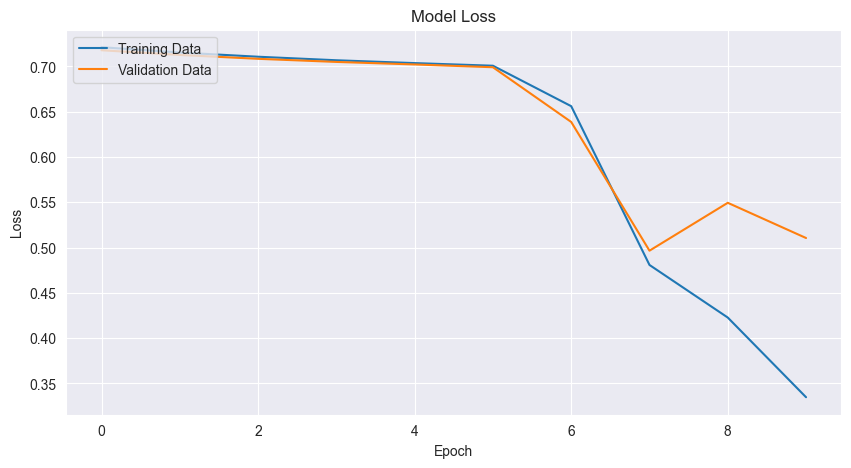

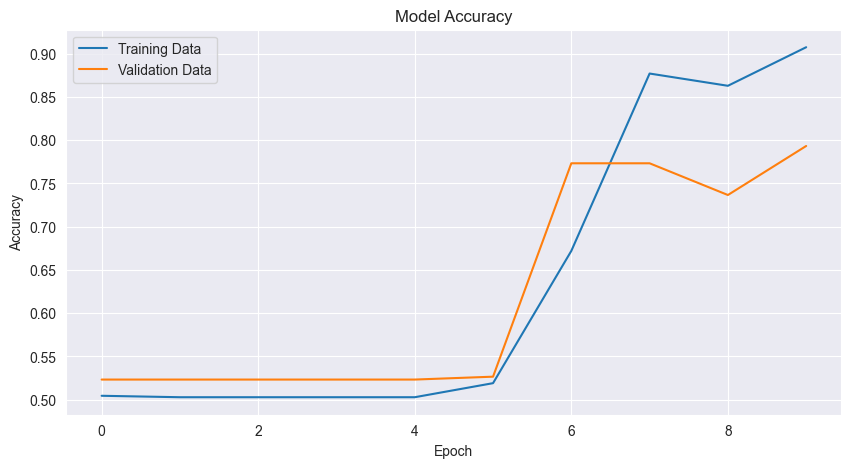

In [47]:
fit_overfit(history1, 10)

###### Predictive accuracy
The model was fit on the test data to evaluate the accuracy of predictions

In [48]:
# Evaluate the model
loss, accuracy = model1.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.3f}')
print(f'Test Loss: {loss:.3f}')

10/10 [==============================] - 0s 5ms/step - loss: 0.4969 - accuracy: 0.7700
Test Accuracy: 0.770
Test Loss: 0.497


###### Confusion Matrix

10/10 [==============================] - 0s 4ms/step


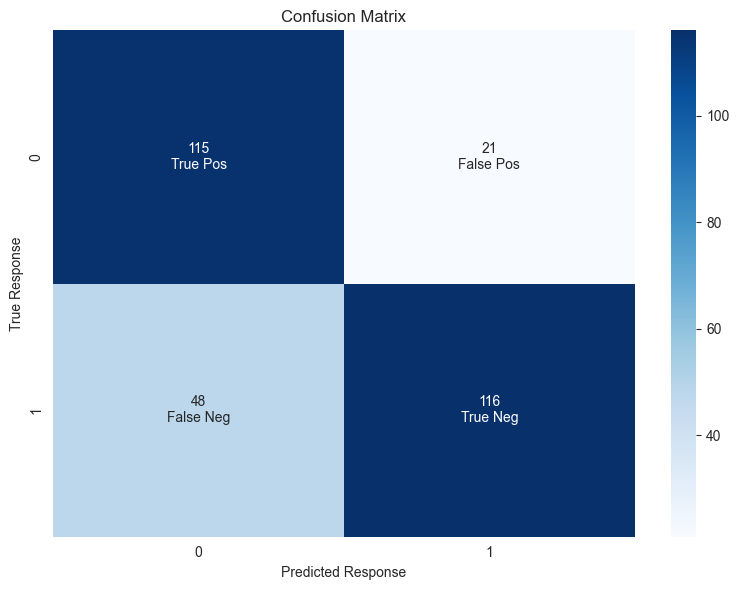

In [49]:
# Make predictions
predictions = model1.predict(X_test)
predictions = (predictions > 0.5).astype(int)  # For binary classification

# Create confusion matrix
classes = np.unique(y_test)
cm = confusion_matrix(y_test, predictions, labels=classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=classes,
            yticklabels=classes,
            cbar=True)

# Add labels
n_classes = len(classes)

for i in range(n_classes):
    for j in range(n_classes):
        text = plt.gca().texts[i * n_classes + j]
        value = text.get_text()
        if i == j:
            text.set_text(f'{value}\nTrue Pos' if i == 0 else f'{value}\nTrue Neg')
        else:
            text.set_text(f'{value}\nFalse Pos' if i == 0 else f'{value}\nFalse Neg')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Response')
plt.ylabel('True Response')
plt.tight_layout()
plt.show()

###### Precision, Recall, and F1 Score

In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Further evaluation of the model using precision, recall and F!
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

Precision: 0.847
Recall: 0.707
F1 Score: 0.771


## Part V: Summary
--------------------------

### E : Code
The final model was saved and can be found in the PA submission as PBier_task2.h5 .

In [51]:
# Save Model
model1.save('PBier_task2.h5')

### F: Functionality

The functionality of the final NN model was successful with the final accuracy of 77%. The initial model with the training and validation data had [better accuracy](#Accuracy-Comparison) rates, although the first model appeared to have overfitting problems. The final model had the same number of layers, but had a large increase in the number of trainable parameters, a jump from 77,881 to 225,327, which may have overcomplicated the model, leading to the lower accuracy. The `model.summary()` in the cell below shows the new parameter values for the final model.

The network architecture was built in such a way as to help with overfitting. The GlobalAveragePooling layer was included to reduce the sequence dimension, as well as including two dropout layers, which can help with the overfitting problem often encountered. Building optimizers can help with hyperparameters, but the number and types of hidden layers is a trial an error process that can take a large amount of time to narrow down the best structure for a NN. Despite efforts to include layers that help reduce complexity, the number of layers themselves may have been contributing to the lower accuracy and overfitting of the model.

Final model architecture:

1. Embedding layer: 154,462 parameters

2. Masking layer

3. Bidirectional LSTM layer: 66,000 parameters, Swish activation

4. GlobalAveragePooling1D layer

5. Dropout layer

6. Dense layer: 4,832 parameters, L2 Regularizer, Swish activation

7. Dropout layer

8. Dense layer: 33 parameters, Sigmoid Activation

Total parameters: 225,327 (all trainable)


In [52]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 44, 34)            154462    
                                                                 
 bidirectional (Bidirectiona  (None, 44, 150)          66000     
 l)                                                              
                                                                 
 global_average_pooling1d (G  (None, 150)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense (Dense)               (None, 32)                4832      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0

##### Accuracy Comparison

In [ ]:
# Compare accuracies
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
test_acc = accuracy
# Create bar plot
plt.figure(figsize=(10, 6))
colors = ['#2ecc71', '#3498db', '#e74c3c']  # Green, Blue, Red
bars = plt.bar(['Training', 'Validation', 'Test'],
        [final_train_acc, final_val_acc, test_acc],
        color=colors)
plt.title('Model Accuracy Comparison', fontsize=14, pad=20)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 1)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1%}',
             ha='center', va='bottom')

plt.show()

### G: Recommendations

While the current model shows promise with 77% accuracy, creating a more reliable tool to identify customer satisfaction trends should be prioritized over rolling out a model that is not fully reliable. There are several recommendations that could create a highly reliable model that would accurately detect customer sentiment.

The first would be to gather more data for training. The smaller amount of data, only 3,000 rows, may have been a large cause of the overfitting seen in both the primary and final model. Smaller data sets can hinder the learning process because the model will just memorize the information, rather than learning from it.

A second recommendation would be to tune the learning rate. As seen [here](#Parameter-Importance), the learning rate had the most influence on the outcome of this model, and is known to have a strong influence on the outcomes of neural networks (Preferred Networks, Inc., 2024).

Changing the hidden layers to find an improved accuracy rate would also be recommended, although this is time intensive, since with each change in the model architecture, the hyperparameters will have to be re-optimized. There is no computationally efficient way to determine the number and types of layers to include in a NN.

Once these changes achieve a higher accuracy rate, businesses could implement the NLP BiLSTM model to automatically identify negative customer reviews, which could be rapidly addressed in an attempt to improve customer satisfaction.

###### Parameter Importance

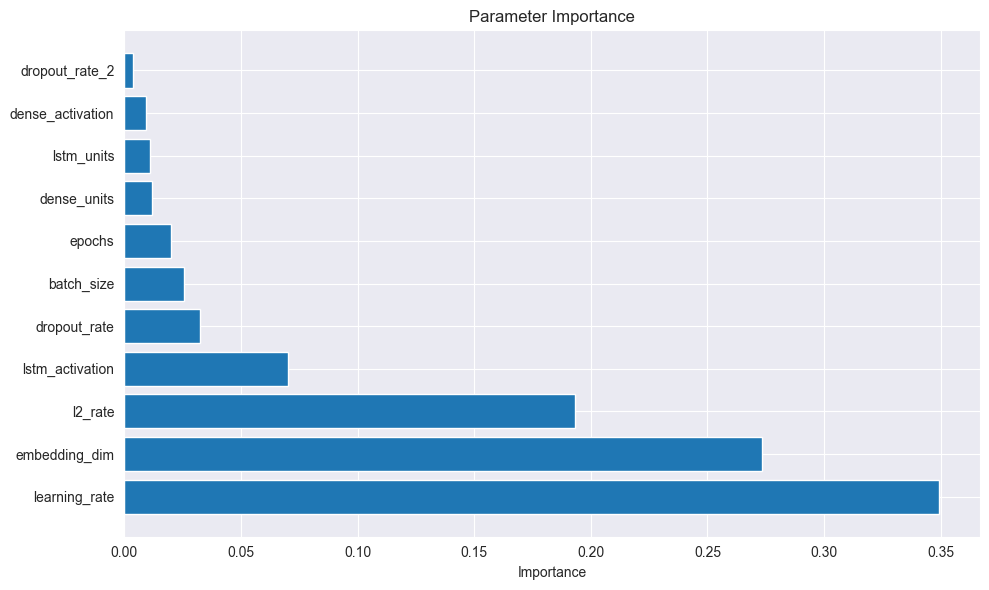

In [53]:
# Parameter importance
importances = optuna.importance.get_param_importances(study)
plt.figure(figsize=(10, 6))
params = list(importances.keys())
values = list(importances.values())
plt.barh(params, values)
plt.xlabel('Importance')
plt.title('Parameter Importance')
plt.tight_layout()
plt.show()


## Part VI: Reporting
---------------------------------

### H: Executed Code
All code has been executed in the Jupyter notebook. A copy of this presentation will be saved in both HTML and PDF format for submission to the PA.

### I: Web Sources
Akinremi, B. (2024, August 7). Optuna for Deep Reinforcement Learning in Python. DataCamp. Retrieved February 15, 2025, from https://www.datacamp.com/tutorial/optuna

Ali, M. (2024, September 12). Introduction to Activation Functions in Neural Networks. DataCamp. Retrieved February 1, 2025, from https://www.datacamp.com/tutorial/introduction-to-activation-functions-in-neural-networks

Boros, G. (2023, August 16). Do you know overfitting and underfitting? Medium. Retrieved February 15, 2025, from https://medium.com/@datascienceeurope/do-you-know-overfitting-and-underfitting-f27f87ac2f37

Baheti, P. (2021, September 13). Train Test Validation Split: How To & Best Practices. V7. Retrieved February 1, 2025, from https://www.v7labs.com/blog/train-validation-test-set

Brownlee, J. (2019, August 6). A Gentle Introduction to Early Stopping to Avoid Overtraining Neural Networks. Machine Learning Mastery. Retrieved February 1, 2025, from https://machinelearningmastery.com/early-stopping-to-avoid-overtraining-neural-network-models/

Brownlee, J. (2019, August 6). How to Configure the Learning Rate When Training Deep Learning Neural Networks. Machine Learning Mastery. Retrieved February 1, 2025, from https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/

Caner (2020, April 2). Padding for NLP. Medium. Retrieved February 1, 2025, from https://medium.com/@canerkilinc/padding-for-nlp-7dd8598c916a

Google (2017, November 20). Introducing TensorFlow Feature Columns. Google for Developers. Retrieved February 1, 2025, from https://developers.googleblog.com/en/introducing-tensorflow-feature-columns/

Kotzias, D. (2015). Sentiment Labelled Sentences [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C57604

Preferred Networks, Inc. (2024). Optuna - A hyperparameter optimization framework. Optuna. Retrieved February 15, 2025, from https://optuna.org/

Mayo, M. (2023, August 1). Mastering Regular Expressions with Python. KDnuggets. Retrieved February 1, 1025, from https://www.kdnuggets.com/2023/08/mastering-regular-expressions-python.html

Restack (2025, January 1). Lstm Hyperparameter Tuning Optuna. Retrieved February 1, 2025, from https://www.restack.io/p/hyperparameter-tuning-answer-lstm-optuna-cat-ai

Sagar, A. (2019, December 6). 5 Techniques to Prevent Overfitting in Neural Networks. KDNuggets. Retrieved February 15, 2025, from https://www.kdnuggets.com/2019/12/5-techniques-prevent-overfitting-neural-networks.html

Sanchhaya (2024, May 27). Binary Cross Entropy/Log Loss for Binary Classification. Geeks for Geeks. Retrieved February 1, 2025, from https://www.geeksforgeeks.org/binary-cross-entropy-log-loss-for-binary-classification/

Saxena, S. (2024, December 30). What is LSTM? Introduction to Long Short-Term Memory. Analytics Vidhya. Retrieved February 1, 2025, from https://www.analyticsvidhya.com/blog/2021/03/introduction-to-long-short-term-memory-lstm/#h-what-are-bidirectional-lstms

Wei, D. (2024, January 30). Demystifying the Adam Optimizer in Machine Learning. Medium. Retrieved February 1, 2025, from https://medium.com/@weidagang/demystifying-the-adam-optimizer-in-machine-learning-4401d162cb9e

Zhang, A., Lipton, Z. C., Li, M., & Smola, A. J. (2023). Dive into Deep Learning. Cambridge University Press. Retrieved February 1, 2025 from https://d2l.ai/chapter_multilayer-perceptrons/generalization-deep.html


### J: Sources

Bird, S., Klein, E., & Loper, E. (2009). Natural Language Processing with Python. O'Reilly.

Bruce, P., Bruce, A., & Gedeck, P. (2020). Practical Statistics for Data Scientists (p. 222). O'Reilly.

Vajjala, S., Majumder, B., Gupta, A., & Surana, H. (2020). Practical Natural Language Processing. O'Reilly.
